# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [30]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

In [11]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
# BOFA
BAC = data.DataReader('BAC', 'yahoo', start,end)
#Citi
C = data.DataReader('C', 'yahoo', start,end)
# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start,end)
# JP Morgan
JPM = data.DataReader('JPM', 'yahoo', start,end)
# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start,end)
# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start,end)

In [12]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [13]:
df.head()

Attributes       High                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  47.180000  493.799988  129.440002  40.360001  58.490002   
2006-01-04  47.240002  491.000000  128.910004  40.139999  59.279999   
2006-01-05  46.830002  487.799988  127.320000  39.810001  58.590000   
2006-01-06  46.910000  489.000000  129.250000  40.240002  58.849998   
2006-01-09  46.970001  487.399994  130.619995  40.720001  59.290001   

Attributes                   Low                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  31.975000  46.150002  481.100006  124.230003  39.299999  ...   
2006-01-04  31.820000  46.450001  483.500000  126.379997  39.419998  ...   
2006-01-05  31.555000  46.320000  484.000000  125.610001  39.500000  ...   
2006-01-06  31.775000  46.349998  482.000000  127.290001  39.549999  ...   
2006-01-09  31.825001  46.360001  483.000000  128.000000  39.880001  ...   

Attributes     Volume                                     Adj Close  \
Symbols            GS         JPM         MS         WFC        BAC   
Date                                                                  
2006-01-03  6188700.0  12838600.0  5377000.0  11016400.0  35.953278   
2006-01-04  4861600.0  13491500.0  7977800.0  10870000.0  35.571438   
2006-01-05  3717400.0   8109400.0  5778000.0  10158000.0  35.617275   
2006-01-06  4319600.0   7966900.0  6889800.0   8403800.0  35.563797   
2006-01-09  4723500.0  16575200.0  4144500.0   5619600.0  35.586720   

Attributes                                                           
Symbols              C          GS        JPM         MS        WFC  
Date                                                                 
2006-01-03  400.636993  109.526077  28.218613  38.560352  21.485973  
2006-01-04  393.240295  108.013260  28.055744  38.586811  21.236753  
2006-01-05  395.191223  107.970749  28.140720  38.692612  21.213186  
2006-01-06  395.191223  109.500565  28.338987  38.732288  21.337786  
2006-01-09  393.321686  110.817924  28.799276  39.142277  21.334421  

[5 rows x 36 columns]

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [14]:
ticker = 'BAC C GS JPM MS WFC'.split()

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

Here axis =1 to concatenate each stock columns and our keys help us create multilevels for each stock

In [15]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=ticker)

**Set the column name levels (this is filled out for you):**

In [16]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [17]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.560352  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.586811  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.692612  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.732288  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.142277  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.674999  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

## Since information from Yahoo and Google finance is different, we will use the dataset provided in this lecture and use read.pickle to access the information

In [18]:
df = pd.read_pickle('all_banks')

**Check the head of the bank_stocks dataframe.**

In [19]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

In [20]:
for i in ticker:
    print(i, '$' + str(df[i]['Close'].max().round(2)))

BAC $54.9
C $564.1
GS $247.92
JPM $70.08
MS $89.3
WFC $58.52


XS or cross section shortcut to retrieve values, here key is our columns, axis must equal 1 to refer to columns and we need to specified level because it could be Bank ticker or Stock info, since we getting close date it should be Stock Info

In [21]:
df.xs(key='Close',axis=1,level ='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [22]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [23]:
for i in ticker:
    returns[i+'Return'] = df[i]['Close'].pct_change()

In [24]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?** 

Here since row 0 is NA, we start from 1st row

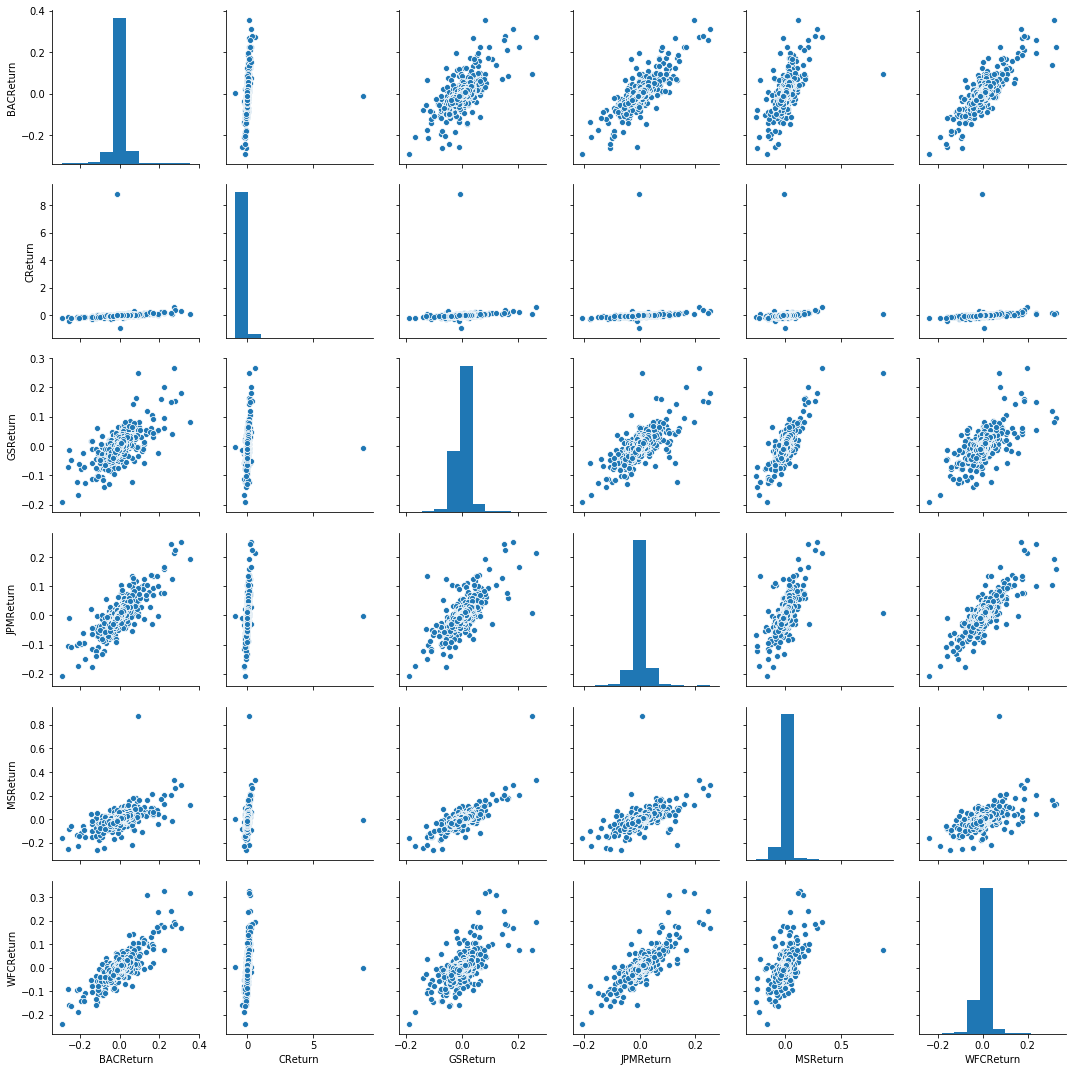

In [25]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?** 

Instead of argmin(), we are gonna use idxmin() to retrieve time stamp because argmin is deprecated and might discontinue

In [98]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [26]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [27]:
returns.std() #Citigroup is the riskiest over the entire time period

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

Here we can use loc to slice a portion of what we need or index slicing, loc for strings 

In [28]:
returns.loc['2015-01-01':'2015-12-31'].std() #Morgan Stanley or BofA as riskiest for 2015

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

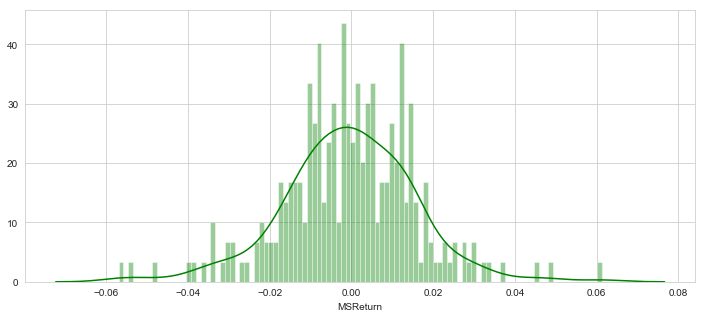

In [31]:
plt.figure(figsize=(12,5))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=100)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

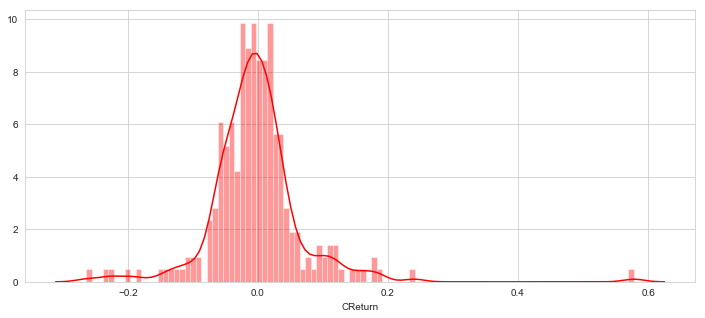

In [32]:
plt.figure(figsize=(12,5))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

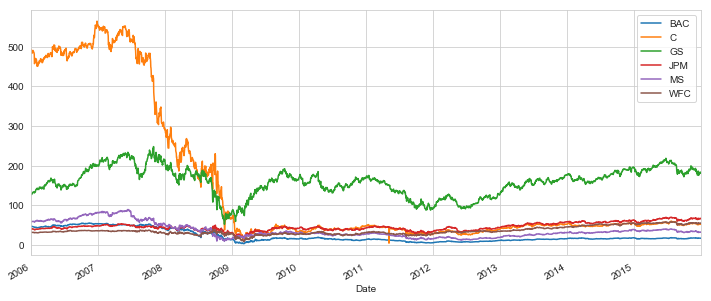

In [34]:
for i in ticker:
    df[i]['Close'].plot(label=i,figsize = (12,5))
plt.legend()

Another method is to use .xs for a cross section of the data

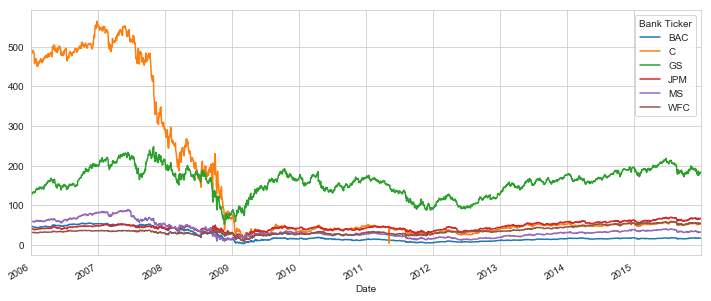

In [35]:
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,5))

Here we use plotly to graph the same chart but more interactive

In [36]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Pandas allow to use rolling for moving average, and window is for how many days in this case 30

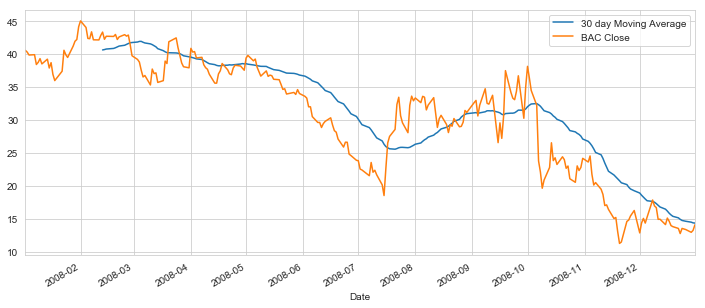

In [63]:
plt.figure(figsize=(12,5))
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label= '30 day Moving Average')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

Use annot=True to display values or numbers in the boxes

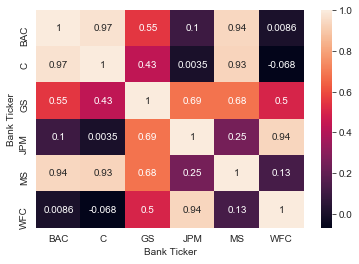

In [68]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Use seaborn's clustermap to cluster the correlations together:**

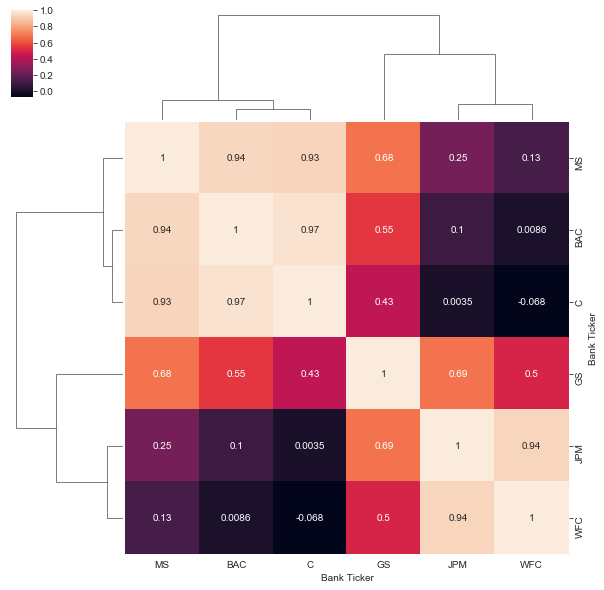

In [69]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [37]:
close_date = df.xs(key='Close',axis=1,level='Stock Info').corr()

seaborn heatmap graph has a better representation

In [38]:
close_date.iplot(kind='heatmap',colorscale='rdylbu')

In [39]:
BAC = df.xs(key='BAC',axis=1,level='Bank Ticker')

In [40]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

Candle very interesting to see if stock close higher or lower that day

In [41]:
bac15.iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

Here ta_plot() is for technical analysis, and we specifiy sma for simple moving average and periods for days

In [42]:
df['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

This analysis boll is for the standard deviation of stock price through time 

In [44]:
df['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')